# Plot small-interfering body L1-norm solution

This notebook plots the validation test for multiple inversions and the solution which produces the smallest goal function value for the L1-norm code.

In [1]:
import numpy as np
import matplotlib as mpb
import cPickle as pickle

# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
# importing the pickle file of results
result_path = 'l1-tfa-inversion/multiple-43485/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [4]:
for i, (d0, d) in enumerate(zip(inversion['results'][63][1][1:], inversion['results'][63][1][:-1])):
    print i, (d - d0)/d0

0 0.27980539365818563
1 0.07648361901916281
2 0.006157716698297087
3 0.06918661204164177
4 0.023136365729018386
5 0.08589207450381725
6 0.00502014267821008
7 0.0291539759974471
8 0.028676129094341238
9 0.019259540920679417
10 0.014270536558636485
11 0.013072474865738417
12 0.006623947206035685
13 0.007375089629517665
14 0.0022009400366020445
15 0.005522499007269111
16 0.006585408456404886
17 0.005306605769091989
18 0.0028390819919680474
19 0.002155826869970356
20 0.003092793078101418
21 0.0008499899164630853


In [5]:
inversion['regularization']

array([1.e-04, 1.e-03, 0.e+00, 0.e+00, 1.e-04, 1.e-08, 1.e-05])

In [6]:
# directory to save the figures
filename = '../../manuscript/figures/anitapolis-l1-solution.png'
#filename = ''

In [7]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [8]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [9]:
np.min(gamma_matrix)

24.667144172381143

In [10]:
np.argmin(gamma_matrix)

63

In [11]:
# parameters for the figure
vmin = int(np.min(gamma_matrix))
vmax = 30.
solutions = [[6,3]]
norm = 1
figsize = (4.33, 4.33)
inset_position = (0.4, 0.9)
dpi = 1200
truevalues = []
angles= [8,80,15,38]
area = [6915,6922,685,692]
model = []
inter = False

# Figures

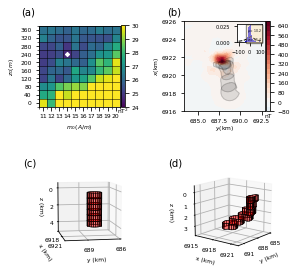

In [12]:
mfun.plot_anitapolis_solution(
    inversion['x'], inversion['y'],
    inversion['z'], inversion['results'][63][3],
    inversion['results'][63][2][-1],
    inversion['results'][63][2][0],
    z0, intensity, gamma_matrix, vmin,
    vmax, solutions, norm, figsize,
    inset_position, dpi, angles, area,
    filename
)